# **Deep Learning Project: Food Cuisine Classification - Phase I**

**Print the number of images in each food folder**

In [ ]:
#! unzip Foodall.zip

Archive:  Foodall.zip
replace __MACOSX/._Foodall? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import os 

In [2]:
! rm 'Foodall/.DS_Store'
#/Users/qing/Documents/UMSL PhD/Spring2021/5390/Project/Pic

rm: cannot remove 'Foodall/.DS_Store': No such file or directory


In [3]:
base_dir = 'Foodall'
for food in os.listdir(base_dir):
    print(base_dir+'/'+food+': '+str(len(os.listdir(base_dir+'/'+food))))


Foodall/Chinese: 191
Foodall/Japanese: 299
Foodall/Italian: 210
Foodall/American: 319
Foodall/Indian: 249


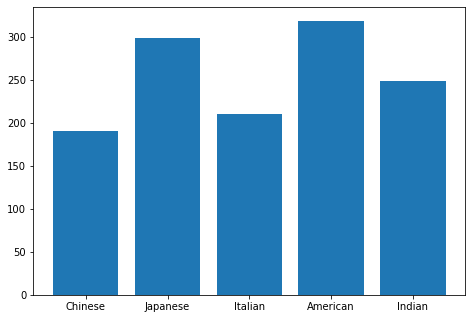

In [4]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
foodcuisine=os.listdir(base_dir)
imagesnum=[191,299,210,319,249]
ax.bar(foodcuisine,imagesnum)
plt.show()

**Bar Plot to show Distribution of output classes**

**Image preprocessing using Pillow and Matplotlib**

In [5]:
import PIL 

In [6]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('Foodall/American/American100.jpeg')

(275, 183, 3)


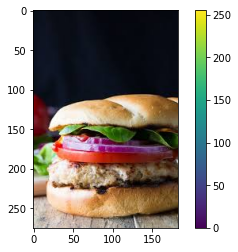

In [7]:
# Using imshow and numpy to display the image
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(np.asarray(image).shape)
imshow(np.asarray(image))
plt.imshow(np.asarray(image))
plt.colorbar()

**Pixel Normalization**

In [8]:
from numpy import asarray

In [9]:
pixels = asarray(image)
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000


In [10]:
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Min: 0.000, Max: 1.000


**Build Generators using ImageDataGenerator**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [175]:
# Image augmentation
my_augmented_generator = ImageDataGenerator(
    rescale=1./255, # Another way to do the normalization
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

# Build generator
my_image_generator = my_augmented_generator.flow_from_directory(base_dir, 
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
class_dictionary = my_image_generator.class_indices
print(class_dictionary)

Found 1267 images belonging to 5 classes.
{'American': 0, 'Chinese': 1, 'Indian': 2, 'Italian': 3, 'Japanese': 4}


**Images Visualization from Data Generator**

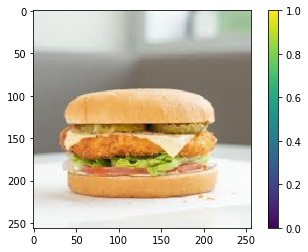

[1. 0. 0. 0. 0.]


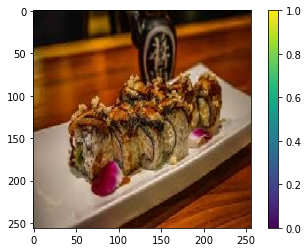

[0. 0. 0. 0. 1.]


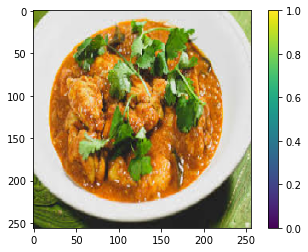

[0. 0. 1. 0. 0.]


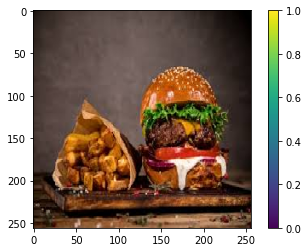

[1. 0. 0. 0. 0.]


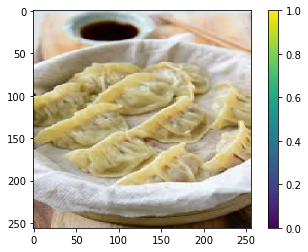

[0. 1. 0. 0. 0.]


In [13]:
for my_batch in my_image_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(my_batch[1])):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break


**Show Images as Grid**

In [14]:
def visualization(image_generator,num_of_images=25,grid=5):
  i =1
  stop=False
  for batch in image_generator:
    images = batch[0]
    labels = batch[1]
    plt.figure(figsize=(20, 20))
    if i < num_of_images:
      for j in images:
        plt.subplot(grid, grid, i)
        plt.imshow(j)
        i +=1
        if i > num_of_images:
          stop = True;
          break
      else:
          break
      if stop == True:
       break


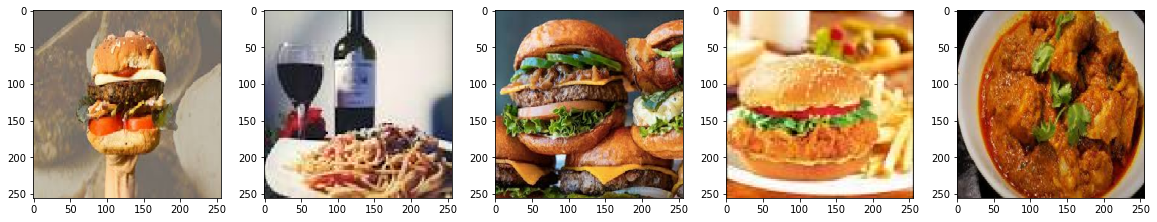

In [15]:
visualization(my_image_generator,num_of_images=10)

# **Deep Learning Project: Food Cuisine Classification - Phase II**

**Build Model**

In [49]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[]


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPool2D

In [243]:
model_1l16d = Sequential()
model_1l16d.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model_1l16d.add( MaxPool2D(4, 4) )
model_1l16d.add( Flatten() )
model_1l16d.add( Dense( 10, activation = 'relu' ) )
model_1l16d.add( Dense( 5, activation = 'softmax' ) )
model_1l16d.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_139 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
flatten_77 (Flatten)         (None, 63504)             0         
_________________________________________________________________
dense_150 (Dense)            (None, 10)                635050    
_________________________________________________________________
dense_151 (Dense)            (None, 5)                 55        
Total params: 635,553
Trainable params: 635,553
Non-trainable params: 0
_________________________________________________________________


In [244]:
model_1l16d.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_1l16d = model_1l16d.fit( my_image_generator, validation_data = my_image_generator, epochs = 50, batch_size = 32 )


Epoch 1/50
254/254 [==============================] - 11s 41ms/step - loss: 2.0993 - accuracy: 0.2552 - val_loss: 1.6015 - val_accuracy: 0.2518
Epoch 2/50
254/254 [==============================] - 10s 41ms/step - loss: 1.6004 - accuracy: 0.2602 - val_loss: 1.5969 - val_accuracy: 0.2518
Epoch 3/50
254/254 [==============================] - 10s 41ms/step - loss: 1.5945 - accuracy: 0.2705 - val_loss: 1.5939 - val_accuracy: 0.2518
Epoch 4/50
254/254 [==============================] - 10s 41ms/step - loss: 1.5939 - accuracy: 0.2455 - val_loss: 1.5923 - val_accuracy: 0.2518
Epoch 5/50
254/254 [==============================] - 10s 40ms/step - loss: 1.5987 - accuracy: 0.2273 - val_loss: 1.5914 - val_accuracy: 0.2518
Epoch 6/50
254/254 [==============================] - 10s 40ms/step - loss: 1.5963 - accuracy: 0.2433 - val_loss: 1.5909 - val_accuracy: 0.2518
Epoch 7/50
254/254 [==============================] - 10s 41ms/step - loss: 1.5877 - accuracy: 0.2666 - val_loss: 1.5905 - val_accuracy:

In [249]:
model_2l16 = Sequential()
model_2l16.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model_2l16.add( MaxPool2D(4, 4) )
model_2l16.add( Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model_2l16.add( Flatten() )
model_2l16.add( Dense( 10, activation = 'relu' ) )
model_2l16.add( Dense( 5, activation = 'softmax' ) )
model_2l16.summary()

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_146 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 61, 61, 8)         1160      
_________________________________________________________________
flatten_81 (Flatten)         (None, 29768)             0         
_________________________________________________________________
dense_158 (Dense)            (None, 10)                297690    
_________________________________________________________________
dense_159 (Dense)            (None, 5)                 55        
Total params: 299,353
Trainable params: 299,353
Non-trainable params: 0
_______________________________________________

In [250]:
model_2l16.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_2l16 = model_2l16.fit( my_image_generator, validation_data = my_image_generator, epochs = 50, batch_size = 32 )

Epoch 1/50
254/254 [==============================] - 12s 46ms/step - loss: 1.5978 - accuracy: 0.2386 - val_loss: 1.3749 - val_accuracy: 0.3891
Epoch 2/50
254/254 [==============================] - 11s 45ms/step - loss: 1.3937 - accuracy: 0.4188 - val_loss: 1.1695 - val_accuracy: 0.5059
Epoch 3/50
254/254 [==============================] - 11s 45ms/step - loss: 1.0622 - accuracy: 0.5832 - val_loss: 0.9034 - val_accuracy: 0.6306
Epoch 4/50
254/254 [==============================] - 11s 45ms/step - loss: 0.7672 - accuracy: 0.7255 - val_loss: 0.4077 - val_accuracy: 0.8556
Epoch 5/50
254/254 [==============================] - 11s 44ms/step - loss: 0.4282 - accuracy: 0.8535 - val_loss: 0.3216 - val_accuracy: 0.8982
Epoch 6/50
254/254 [==============================] - 11s 45ms/step - loss: 0.2790 - accuracy: 0.8986 - val_loss: 0.2066 - val_accuracy: 0.9321
Epoch 7/50
254/254 [==============================] - 12s 45ms/step - loss: 0.1827 - accuracy: 0.9441 - val_loss: 0.1192 - val_accuracy:

In [251]:
model_2l32 = Sequential()
model_2l32.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model_2l32.add( MaxPool2D(4, 4) )
model_2l32.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model_2l32.add( Flatten() )
model_2l32.add( Dense( 10, activation = 'relu' ) )
model_2l32.add( Dense( 5, activation = 'softmax' ) )
model_2l32.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 61, 61, 16)        4624      
_________________________________________________________________
flatten_82 (Flatten)         (None, 59536)             0         
_________________________________________________________________
dense_160 (Dense)            (None, 10)                595370    
_________________________________________________________________
dense_161 (Dense)            (None, 5)                 55        
Total params: 600,945
Trainable params: 600,945
Non-trainable params: 0
_______________________________________________

In [252]:
model_2l32.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_2l32 = model_2l32.fit( my_image_generator, validation_data = my_image_generator, epochs = 50, batch_size = 32 )


Epoch 1/50
254/254 [==============================] - 16s 63ms/step - loss: 2.0511 - accuracy: 0.2937 - val_loss: 1.4980 - val_accuracy: 0.3481
Epoch 2/50
254/254 [==============================] - 16s 63ms/step - loss: 1.5378 - accuracy: 0.3385 - val_loss: 1.5010 - val_accuracy: 0.3765
Epoch 3/50
254/254 [==============================] - 16s 63ms/step - loss: 1.4047 - accuracy: 0.3754 - val_loss: 1.2724 - val_accuracy: 0.5091
Epoch 4/50
254/254 [==============================] - 16s 63ms/step - loss: 1.1604 - accuracy: 0.5438 - val_loss: 1.0559 - val_accuracy: 0.6148
Epoch 5/50
254/254 [==============================] - 16s 63ms/step - loss: 0.8326 - accuracy: 0.7121 - val_loss: 0.5042 - val_accuracy: 0.8295
Epoch 6/50
254/254 [==============================] - 16s 64ms/step - loss: 0.5157 - accuracy: 0.8036 - val_loss: 0.3194 - val_accuracy: 0.9045
Epoch 7/50
254/254 [==============================] - 16s 64ms/step - loss: 0.3021 - accuracy: 0.8937 - val_loss: 0.1721 - val_accuracy:

In [187]:
model_3l64 = Sequential()
model_3l64.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model_3l64.add( MaxPool2D(4, 4) )
model_3l64.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model_3l64.add( MaxPool2D(4, 4) )
model_3l64.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model_3l64.add( MaxPool2D(4, 4) )
model_3l64.add( Flatten() )
model_3l64.add( Dense( 10, activation = 'relu' ) )
model_3l64.add( Dense( 5, activation = 'softmax' ) )
model_3l64.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 144)             

In [23]:
model_3l64.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_3l64 = model_3l64.fit( my_image_generator, validation_data = my_image_generator, epochs = 50, batch_size = 32 )

Epoch 1/50
254/254 [==============================] - 30s 115ms/step - loss: 1.5563 - accuracy: 0.2859 - val_loss: 1.4220 - val_accuracy: 0.3512
Epoch 2/50
254/254 [==============================] - 29s 113ms/step - loss: 1.3606 - accuracy: 0.3898 - val_loss: 1.1933 - val_accuracy: 0.4767
Epoch 3/50
254/254 [==============================] - 29s 113ms/step - loss: 1.2280 - accuracy: 0.4794 - val_loss: 0.9733 - val_accuracy: 0.6093
Epoch 4/50
254/254 [==============================] - 29s 113ms/step - loss: 1.0409 - accuracy: 0.5645 - val_loss: 0.8553 - val_accuracy: 0.6480
Epoch 5/50
254/254 [==============================] - 29s 113ms/step - loss: 0.9034 - accuracy: 0.6318 - val_loss: 0.7465 - val_accuracy: 0.7127
Epoch 6/50
254/254 [==============================] - 29s 113ms/step - loss: 0.7966 - accuracy: 0.7085 - val_loss: 0.7594 - val_accuracy: 0.7238
Epoch 7/50
254/254 [==============================] - 29s 112ms/step - loss: 0.7842 - accuracy: 0.7014 - val_loss: 0.8970 - val_ac

In [254]:
model_5l = Sequential()
model_5l.add( Conv2D( 256, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model_5l.add( MaxPool2D(4, 4) )
model_5l.add( Conv2D( 128, ( 3, 3), activation = 'relu' ) )
model_5l.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model_5l.add( MaxPool2D(4, 4) )
model_5l.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model_5l.add( MaxPool2D(4, 4) )
model_5l.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model_5l.add( Flatten() )
model_5l.add( Dense( 10, activation = 'relu' ) )
model_5l.add( Dense( 5, activation = 'softmax' ) )
model_5l.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 254, 254, 256)     7168      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 61, 61, 128)       295040    
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 59, 59, 64)        73792     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 3, 3, 32)        

In [255]:
model_5l.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_5l = model_5l.fit( my_image_generator, validation_data = my_image_generator, epochs = 50 , batch_size = 32 )

Epoch 1/50
254/254 [==============================] - 114s 446ms/step - loss: 1.5882 - accuracy: 0.2451 - val_loss: 1.3916 - val_accuracy: 0.3923
Epoch 2/50
254/254 [==============================] - 112s 442ms/step - loss: 1.3881 - accuracy: 0.4160 - val_loss: 1.3340 - val_accuracy: 0.3986
Epoch 3/50
254/254 [==============================] - 112s 441ms/step - loss: 1.2300 - accuracy: 0.5095 - val_loss: 1.1345 - val_accuracy: 0.5272
Epoch 4/50
254/254 [==============================] - 112s 443ms/step - loss: 1.1010 - accuracy: 0.5409 - val_loss: 1.0500 - val_accuracy: 0.5525
Epoch 5/50
254/254 [==============================] - 112s 442ms/step - loss: 1.0486 - accuracy: 0.5562 - val_loss: 0.9616 - val_accuracy: 0.5959
Epoch 6/50
254/254 [==============================] - 112s 442ms/step - loss: 0.9797 - accuracy: 0.5836 - val_loss: 0.8824 - val_accuracy: 0.6156
Epoch 7/50
254/254 [==============================] - 112s 442ms/step - loss: 0.9479 - accuracy: 0.6228 - val_loss: 0.8028 -

**Learning Curve Visualization** 

In [256]:
import matplotlib.pyplot as plt

In [258]:
# list all data in history
print(history_1l16d.history.keys())
print(history_2l16.history.keys())
print(history_2l32.history.keys())
print(history2.history.keys())
print(history_5l.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


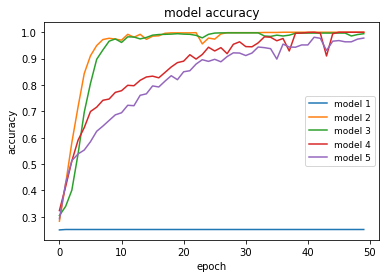

In [301]:
# summarize history for accuracy
plt.plot(history_1l16d.history['accuracy'])
plt.plot(history_2l16.history['accuracy'])
plt.plot(history_2l32.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history_5l.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2','model 3','model 4','model 5'], loc='best',prop={'size': 9})
plt.show()

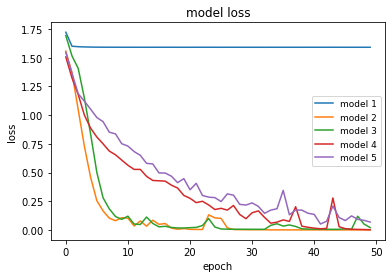

In [302]:
# summarize history for loss
plt.plot(history_1l16d.history['loss'])
plt.plot(history_2l16.history['loss'])
plt.plot(history_2l32.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history_5l.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2','model 3','model 4','model 5'], loc='best',prop={'size': 9} )
plt.show()

**Provide The Output as The Input**

In [261]:
# Build generator
my_image_generator = my_augmented_generator.flow_from_directory(base_dir, 
                                                      target_size=(256, 256), 
                                                      batch_size=1, 
                                                      class_mode='categorical',
                                                      ) 

Found 1267 images belonging to 5 classes.


In [262]:
# Empty placeholders for 1267 RGB images and their labels
mydatax = np.zeros((1267, 256, 256, 3))
mydatay = np.zeros((1267, 1))
mydatay_of = np.zeros((1267, 5))
# Read everything from your generator
for i in range(1267):
   x, y = next(my_image_generator)
   mydatax[i] = x
   mydatay_of[i] = y
   mydatay[i] = np.where(y[0]==1)[0][0]

In [263]:
prediction_m1 = model_1l16d.predict(mydatax)
prediction_m2 = model_2l16.predict(mydatax)
prediction_m3 = model_2l32.predict(mydatax)
prediction_m4 = model_3l64.predict(mydatax)
prediction_m4 = model_5l.predict(mydatax)

In [264]:
print("Model 1 acc =",np.mean(np.array(mydatay)[:,0] == np.argmax(prediction_m1,1)))
print("Model 2 acc =",np.mean(np.array(mydatay)[:,0] == np.argmax(prediction_m2,1)))
print("Model 3 acc =",np.mean(np.array(mydatay)[:,0] == np.argmax(prediction_m3,1)))
print("Model 4 acc =",np.mean(np.array(mydatay)[:,0] == np.argmax(prediction_m4,1)))
print("Model 5 acc =",np.mean(np.array(mydatay)[:,0] == np.argmax(prediction_m4,1)))

Model 1 acc = 0.2517758484609313
Model 2 acc = 1.0
Model 3 acc = 0.9968429360694554
Model 4 acc = 0.9810576164167324
Model 5 acc = 0.9810576164167324


In [324]:
# Example of how to use output labels as additional input channel
import numpy as np
N = len(mydatax[:, 0, 0, 0])
L = len(mydatax[0, :, 0, 0])
mydatax_with_outputlabels = np.zeros((N, L, L, 4))
for i in range(len(mydatax)):
   existing = mydatax[i, :, :, :]
   newchannel = np.full((L, L), mydatay[i]).reshape(L, L, 1)/10.0
   x = np.concatenate((existing, newchannel), axis = -1)
   print(existing.shape, newchannel.shape, x.shape)
   mydatax_with_outputlabels[i] = x
   #break


(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 256, 4)
(256, 256, 3) (256, 256, 1) (256, 

In [372]:
model_outasin = Sequential()
model_outasin.add( Conv2D( 4, ( 3, 3 ), activation = 'relu', input_shape = (256,256,4)) )
model_outasin.add( MaxPool2D(4, 4) )
#model_outasin.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model_outasin.add( Flatten() )
model_outasin.add( Dense( 10, activation = 'relu' ) )
model_outasin.add( Dense( 5, activation = 'softmax' ) )
model_outasin.summary()

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 254, 254, 4)       148       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 63, 63, 4)         0         
_________________________________________________________________
flatten_104 (Flatten)        (None, 15876)             0         
_________________________________________________________________
dense_209 (Dense)            (None, 10)                158770    
_________________________________________________________________
dense_210 (Dense)            (None, 5)                 55        
Total params: 158,973
Trainable params: 158,973
Non-trainable params: 0
_________________________________________________________________


In [373]:
print(mydatax_with_outputlabels.shape)
mydata_x_lab = mydatax_with_outputlabels
print(mydata_x_lab.shape)
# mydata_x_lab[:,:,:,3] = mydata_x_lab[:,:,:,3]/4
# print(mydata_x_lab.shape)

(1267, 256, 256, 4)
(1267, 256, 256, 4)


In [374]:
print(mydata_x_lab[0,:2,:2])
print(mydatay_of[0])

[[[0.92156869 0.89019614 0.88235301 0.2       ]
  [0.90196085 0.8705883  0.86274517 0.2       ]]

 [[0.92156869 0.89019614 0.88235301 0.2       ]
  [0.90196085 0.8705883  0.86274517 0.2       ]]]
[0. 0. 1. 0. 0.]


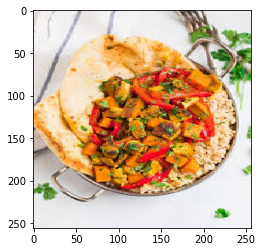

In [375]:
plt.imshow(mydata_x_lab[0,:,:,:3])

In [376]:
#from tensorflow.keras.optimizers import SGD

In [377]:
 model_outasin.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
#opt = SGD(lr=0.00001)
model_outasin.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_outasin = model_outasin.fit( mydata_x_lab, mydatay_of, epochs = 50, batch_size = 16 )

Epoch 1/50
80/80 [==============================] - 5s 51ms/step - loss: 1.5232 - accuracy: 0.3983
Epoch 2/50
80/80 [==============================] - 4s 51ms/step - loss: 0.9766 - accuracy: 0.6106
Epoch 3/50
80/80 [==============================] - 4s 50ms/step - loss: 0.7782 - accuracy: 0.7714
Epoch 4/50
80/80 [==============================] - 4s 50ms/step - loss: 0.6402 - accuracy: 0.8298
Epoch 5/50
80/80 [==============================] - 4s 50ms/step - loss: 0.4957 - accuracy: 0.8854
Epoch 6/50
80/80 [==============================] - 4s 51ms/step - loss: 0.4164 - accuracy: 0.9314
Epoch 7/50
80/80 [==============================] - 4s 50ms/step - loss: 0.3378 - accuracy: 0.9473
Epoch 8/50
80/80 [==============================] - 4s 51ms/step - loss: 0.2704 - accuracy: 0.9568
Epoch 9/50
80/80 [==============================] - 4s 50ms/step - loss: 0.2377 - accuracy: 0.9709
Epoch 10/50
80/80 [==============================] - 4s 51ms/step - loss: 0.2328 - accuracy: 0.9610
Epoch 11/

In [378]:
print(history_outasin.history.keys())

dict_keys(['loss', 'accuracy'])


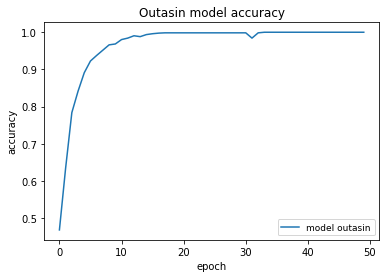

In [379]:
plt.plot(history_outasin.history['accuracy'])
plt.title('Outasin model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model outasin'], loc='best',prop={'size': 9})
plt.show()

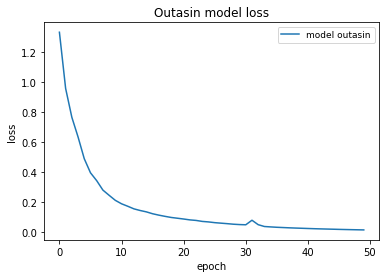

In [381]:
# summarize history for loss
plt.plot(history_outasin.history['loss'])
plt.title('Outasin model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model outasin'], loc='best',prop={'size': 9} )
plt.show()

# **Deep Learning Project: Food Cuisine Classification - Phase III**

In [4]:
! unzip -o testing.zip

Archive:  testing.zip
  inflating: __MACOSX/._testing      
  inflating: __MACOSX/testing/._Indian  
  inflating: testing/.DS_Store       
  inflating: __MACOSX/testing/._.DS_Store  
  inflating: __MACOSX/testing/._Japanese  
  inflating: __MACOSX/testing/._Italian  
  inflating: __MACOSX/testing/._Chinese  
  inflating: __MACOSX/testing/._American  
  inflating: testing/Indian/Indian_test33.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test33.jpeg  
  inflating: testing/Indian/Indian_test4.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test4.jpeg  
  inflating: testing/Indian/Indian_test25.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test25.jpeg  
  inflating: testing/Indian/Indian_test48.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test48.jpeg  
  inflating: testing/Indian/Indian_test8.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test8.jpeg  
  inflating: testing/Indian/Indian_test29.jpeg  
  inflating: __MACOSX/testing/Indian/._Indian_test29.jpeg

In [5]:
! unzip -o training.zip

Archive:  training.zip
  inflating: __MACOSX/._training     
  inflating: __MACOSX/training/._Indian  
  inflating: training/.DS_Store      
  inflating: __MACOSX/training/._.DS_Store  
  inflating: __MACOSX/training/._Japanese  
  inflating: __MACOSX/training/._Italian  
  inflating: __MACOSX/training/._Chinese  
  inflating: __MACOSX/training/._American  
  inflating: training/Indian/Indian_train66.jpeg  
  inflating: __MACOSX/training/Indian/._Indian_train66.jpeg  
  inflating: training/Indian/Indian_train89.jpeg  
  inflating: __MACOSX/training/Indian/._Indian_train89.jpeg  
  inflating: training/Indian/Indian_train31.jpeg  
  inflating: __MACOSX/training/Indian/._Indian_train31.jpeg  
  inflating: training/Indian/Indian_train27.jpeg  
  inflating: __MACOSX/training/Indian/._Indian_train27.jpeg  
  inflating: training/Indian/Indian_train70.jpeg  
  inflating: __MACOSX/training/Indian/._Indian_train70.jpeg  
  inflating: training/Indian/Indian_train137.jpeg  
  inflating: __MACOSX/t

In [6]:
! unzip -o validation.zip

Archive:  validation.zip
  inflating: __MACOSX/._validation   
  inflating: __MACOSX/validation/._Japanese_val  
  inflating: validation/.DS_Store    
  inflating: __MACOSX/validation/._.DS_Store  
  inflating: __MACOSX/validation/._American_val  
  inflating: __MACOSX/validation/._Chinese_val  
  inflating: __MACOSX/validation/._Indian_val  
  inflating: __MACOSX/validation/._Italian_val  
  inflating: validation/Japanese_val/Japanese_train36.jpeg  
  inflating: __MACOSX/validation/Japanese_val/._Japanese_train36.jpeg  
  inflating: validation/Japanese_val/Japanese_train20.jpeg  
  inflating: __MACOSX/validation/Japanese_val/._Japanese_train20.jpeg  
  inflating: validation/Japanese_val/Japanese_train41.jpeg  
  inflating: __MACOSX/validation/Japanese_val/._Japanese_train41.jpeg  
  inflating: validation/Japanese_val/Japanese_train16.jpeg  
  inflating: __MACOSX/validation/Japanese_val/._Japanese_train16.jpeg  
  inflating: validation/Japanese_val/Japanese_train1.jpeg  
  inflating: _

In [7]:
import os 
! rm 'testing/.DS_Store'
! rm 'training/.DS_Store'
! rm 'validation/.DS_Store'

In [8]:
train_dir = 'training'
for food in os.listdir(train_dir):
    print(train_dir+'/'+food+': '+str(len(os.listdir(train_dir+'/'+food))))

training/Chinese: 123
training/Japanese: 192
training/Italian: 136
training/American: 205
training/Indian: 160


In [9]:
test_dir = 'testing'
for food in os.listdir(test_dir):
    print(test_dir+'/'+food+': '+str(len(os.listdir(test_dir+'/'+food))))

testing/Chinese: 38
testing/Japanese: 60
testing/Italian: 42
testing/American: 64
testing/Indian: 50


In [10]:
val_dir = 'validation'
for food in os.listdir(val_dir):
    print(val_dir+'/'+food+': '+str(len(os.listdir(val_dir+'/'+food))))

validation/American_val: 51
validation/Chinese_val: 30
validation/Indian_val: 40
validation/Japanese_val: 49
validation/Italian_val: 33


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [22]:
# Generator for training dataset
train_generator = my_generator.flow_from_directory( train_dir, target_size=(256, 256), batch_size=5, class_mode='categorical')
# Generator for validation dataset
valid_generator = my_generator.flow_from_directory( val_dir, target_size=(256, 256), batch_size=5, class_mode='categorical')
# Generator for test dataset
test_generator = my_generator.flow_from_directory( test_dir, target_size=(256, 256), batch_size=5, class_mode='categorical')

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


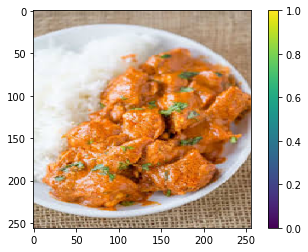

(256, 256, 3)
[0. 0. 1. 0. 0.]


In [19]:
# Check if the generator works 
import matplotlib.pyplot as plt
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [20]:
# Check classes
class_dictionary = train_generator.class_indices
print(class_dictionary)

{'American': 0, 'Chinese': 1, 'Indian': 2, 'Italian': 3, 'Japanese': 4}


In [21]:
#Early Stop:
from tensorflow import keras
a= keras.callbacks.ModelCheckpoint(filepath='model.h5',monitor='val_accuracy',save_best_only=True)
b= keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 15)

**Train the model**

In [194]:
# Model1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model1= Sequential()
model1.add( Conv2D( 8, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model1.add( MaxPool2D(4, 4) )
model1.add( Conv2D( 8, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model1.add( MaxPool2D(4, 4) )
model1.add( Flatten() )
model1.add( Dense( 10, activation = 'relu' ) )
model1.add( Dense( 5, activation = 'softmax' ) )
model1.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_222 (Conv2D)          (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 61, 61, 8)         584       
_________________________________________________________________
max_pooling2d_178 (MaxPoolin (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 1800)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 10)                18010     
_________________________________________________________________
dense_103 (Dense)            (None, 5)               

In [195]:
model1.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history1 = model1.fit( train_generator, validation_data = valid_generator, callbacks=[a,b], epochs= 100, batch_size = 32 )

Epoch 1/100
163/163 [==============================] - 6s 32ms/step - loss: 1.5987 - accuracy: 0.2295 - val_loss: 1.4236 - val_accuracy: 0.4604
Epoch 2/100
163/163 [==============================] - 5s 30ms/step - loss: 1.4043 - accuracy: 0.4108 - val_loss: 1.2392 - val_accuracy: 0.5297
Epoch 3/100
163/163 [==============================] - 5s 30ms/step - loss: 1.2635 - accuracy: 0.4716 - val_loss: 1.1439 - val_accuracy: 0.5396
Epoch 4/100
163/163 [==============================] - 5s 30ms/step - loss: 1.1393 - accuracy: 0.5483 - val_loss: 1.1314 - val_accuracy: 0.5099
Epoch 5/100
163/163 [==============================] - 5s 30ms/step - loss: 1.0263 - accuracy: 0.5890 - val_loss: 1.0428 - val_accuracy: 0.5941
Epoch 6/100
163/163 [==============================] - 5s 30ms/step - loss: 1.0421 - accuracy: 0.5626 - val_loss: 1.0605 - val_accuracy: 0.5149
Epoch 7/100
163/163 [==============================] - 5s 30ms/step - loss: 0.9021 - accuracy: 0.6337 - val_loss: 0.9920 - val_accuracy:

In [224]:
# Evaluate model on test data
#prediction1 = model1.predict( test_generator)
scores = model1.evaluate(test_generator)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

51/51 [==============================] - 1s 10ms/step - loss: 2.0680 - accuracy: 0.5945

accuracy: 59.45%


In [198]:
#Model2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model2 = Sequential()
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model2.add( MaxPool2D(4, 4) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPool2D(4, 4) )
model2.add( Flatten() )
model2.add( Dense( 10, activation = 'relu' ) )
model2.add( Dense( 5, activation = 'softmax' ) )
model2.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_224 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 3600)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 10)                36010     
_________________________________________________________________
dense_105 (Dense)            (None, 5)               

In [199]:
model2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history2 = model2.fit( train_generator, validation_data = valid_generator, callbacks=[a,b], epochs= 100, batch_size = 32 )

Epoch 1/100
163/163 [==============================] - 6s 37ms/step - loss: 1.6167 - accuracy: 0.2410 - val_loss: 1.6033 - val_accuracy: 0.2327
Epoch 2/100
163/163 [==============================] - 6s 36ms/step - loss: 1.5737 - accuracy: 0.2598 - val_loss: 1.4733 - val_accuracy: 0.2921
Epoch 3/100
163/163 [==============================] - 6s 36ms/step - loss: 1.3565 - accuracy: 0.4507 - val_loss: 1.2642 - val_accuracy: 0.4604
Epoch 4/100
163/163 [==============================] - 6s 36ms/step - loss: 1.0723 - accuracy: 0.5828 - val_loss: 1.1035 - val_accuracy: 0.5149
Epoch 5/100
163/163 [==============================] - 6s 36ms/step - loss: 0.9138 - accuracy: 0.6412 - val_loss: 1.0000 - val_accuracy: 0.6040
Epoch 6/100
163/163 [==============================] - 6s 36ms/step - loss: 0.8398 - accuracy: 0.6555 - val_loss: 0.9877 - val_accuracy: 0.6040
Epoch 7/100
163/163 [==============================] - 6s 36ms/step - loss: 0.7135 - accuracy: 0.7337 - val_loss: 1.0405 - val_accuracy:

In [225]:
# Evaluate model on test data
#prediction2 = model2.predict( test_generator)
scores = model2.evaluate(test_generator)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

51/51 [==============================] - 1s 11ms/step - loss: 2.1108 - accuracy: 0.6654

accuracy: 66.54%


In [203]:
#Model3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model3 = Sequential()
model3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model3.add( MaxPool2D(4, 4) )
model3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model3.add( MaxPool2D(4, 4) )
model3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model3.add( MaxPool2D(4, 4) )
model3.add( Flatten() )
model3.add( Dense( 10, activation = 'relu' ) )
model3.add( Dense( 5, activation = 'softmax' ) )
model3.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_226 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_183 (MaxPoolin (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 288)             

In [204]:
model3.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history3 = model3.fit( train_generator, validation_data = valid_generator, callbacks=[a,b], epochs= 100, batch_size = 32 )

Epoch 1/100
163/163 [==============================] - 10s 56ms/step - loss: 1.5850 - accuracy: 0.2651 - val_loss: 1.4242 - val_accuracy: 0.3713
Epoch 2/100
163/163 [==============================] - 9s 55ms/step - loss: 1.4140 - accuracy: 0.3804 - val_loss: 1.3163 - val_accuracy: 0.4901
Epoch 3/100
163/163 [==============================] - 9s 55ms/step - loss: 1.3242 - accuracy: 0.4513 - val_loss: 1.1721 - val_accuracy: 0.5297
Epoch 4/100
163/163 [==============================] - 9s 55ms/step - loss: 1.1903 - accuracy: 0.5214 - val_loss: 1.0793 - val_accuracy: 0.5297
Epoch 5/100
163/163 [==============================] - 9s 55ms/step - loss: 1.0354 - accuracy: 0.5666 - val_loss: 1.1292 - val_accuracy: 0.5347
Epoch 6/100
163/163 [==============================] - 9s 55ms/step - loss: 1.0140 - accuracy: 0.5986 - val_loss: 1.0014 - val_accuracy: 0.5693
Epoch 7/100
163/163 [==============================] - 9s 55ms/step - loss: 0.8429 - accuracy: 0.6416 - val_loss: 0.8752 - val_accuracy

In [226]:
# Evaluate model on test data
#prediction3 = model3.predict( test_generator)
scores = model3.evaluate(test_generator)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

51/51 [==============================] - 1s 13ms/step - loss: 1.1430 - accuracy: 0.7598

accuracy: 75.98%


In [34]:
#Model4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model4 = Sequential()
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4.add( Flatten() )
model4.add( Dense( 10, activation = 'relu' ) )
model4.add( Dense( 5, activation = 'softmax' ) )
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 64)         

In [35]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history4 = model4.fit( train_generator, validation_data = valid_generator, callbacks=[a,b], epochs= 100, batch_size = 64 )

Epoch 1/100
163/163 [==============================] - 18s 108ms/step - loss: 1.6100 - accuracy: 0.2064 - val_loss: 1.5035 - val_accuracy: 0.3020
Epoch 2/100
163/163 [==============================] - 17s 106ms/step - loss: 1.5197 - accuracy: 0.2905 - val_loss: 1.5032 - val_accuracy: 0.2822
Epoch 3/100
163/163 [==============================] - 17s 107ms/step - loss: 1.3973 - accuracy: 0.4006 - val_loss: 1.1859 - val_accuracy: 0.4752
Epoch 4/100
163/163 [==============================] - 17s 105ms/step - loss: 1.1962 - accuracy: 0.4769 - val_loss: 1.0264 - val_accuracy: 0.5446
Epoch 5/100
163/163 [==============================] - 17s 107ms/step - loss: 1.0246 - accuracy: 0.5560 - val_loss: 1.1151 - val_accuracy: 0.5000
Epoch 6/100
163/163 [==============================] - 18s 108ms/step - loss: 0.8489 - accuracy: 0.6536 - val_loss: 0.8027 - val_accuracy: 0.6485
Epoch 7/100
163/163 [==============================] - 17s 106ms/step - loss: 0.5870 - accuracy: 0.7804 - val_loss: 0.8467 -

In [36]:
# Evaluate model on test data
#prediction4 = model4.predict( test_generator)
scores = model4.evaluate(test_generator)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

51/51 [==============================] - 1s 20ms/step - loss: 1.9181 - accuracy: 0.7638

accuracy: 76.38%


**Learning Curve Plots for 4 Models**

In [209]:
print(history1.history.keys())
print(history2.history.keys())
print(history2.history.keys())
print(history4.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


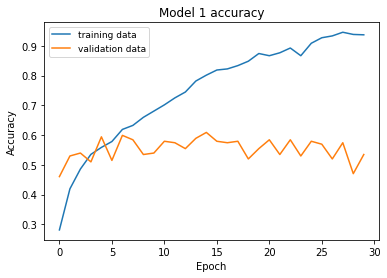

In [210]:
# summarize history for accuracy - Model 1
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

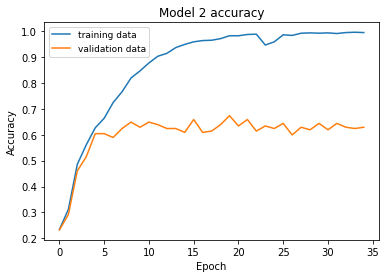

In [211]:
# summarize history for accuracy - Model 2
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

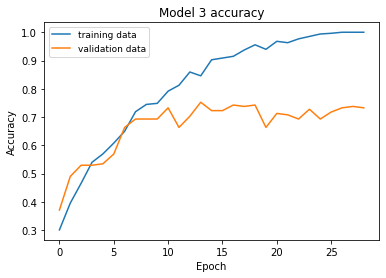

In [212]:
# summarize history for accuracy - Model 3
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model 3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

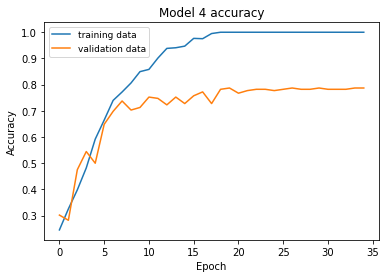

In [37]:
# summarize history for accuracy - Model 4
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model 4 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

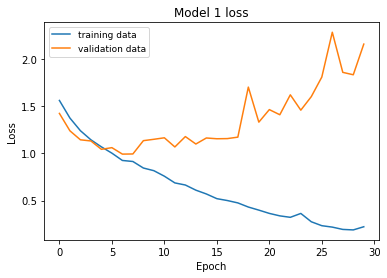

In [219]:
# summarize history for loss -Model 1
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

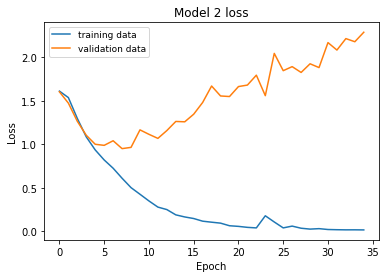

In [220]:
# summarize history for loss -Model 2
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

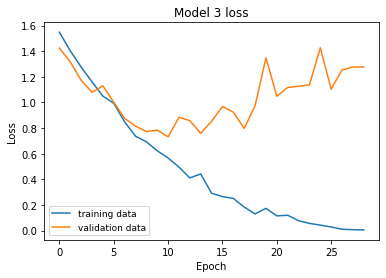

In [221]:
# summarize history for loss -Model 3
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model 3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

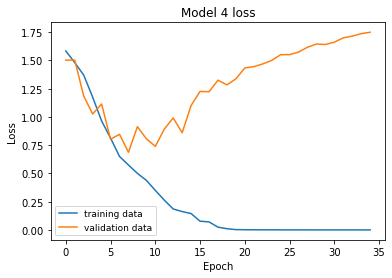

In [38]:
# summarize history for loss -Model 4
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model 4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

# **Deep Learning Project: Food Cuisine Classification - Phase IV**

In [12]:
# Image augmentation 1
my_generator_aug = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

# Build generator
train_generator_best = my_generator_aug.flow_from_directory(train_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
val_generator_best = my_generator_aug.flow_from_directory(val_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
test_generator_best = my_generator_aug.flow_from_directory(test_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
class_dictionary1 = train_generator_best.class_indices
print(class_dictionary1)

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.
{'American': 0, 'Chinese': 1, 'Indian': 2, 'Italian': 3, 'Japanese': 4}


In [16]:
#Model4-Best Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model4 = Sequential()
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4.add( Flatten() )
model4.add( Dense( 10, activation = 'relu' ) )
model4.add( Dense( 5, activation = 'softmax' ) )
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          3

In [44]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history4 = model4.fit( train_generator_best, validation_data = val_generator_best, callbacks=[a,b], epochs= 100, batch_size = 64 )

Epoch 1/100
163/163 [==============================] - 21s 124ms/step - loss: 1.6055 - accuracy: 0.2275 - val_loss: 1.6238 - val_accuracy: 0.2574
Epoch 2/100
163/163 [==============================] - 20s 122ms/step - loss: 1.5284 - accuracy: 0.3173 - val_loss: 1.3987 - val_accuracy: 0.3812
Epoch 3/100
163/163 [==============================] - 20s 121ms/step - loss: 1.3891 - accuracy: 0.3972 - val_loss: 1.2627 - val_accuracy: 0.4505
Epoch 4/100
163/163 [==============================] - 20s 123ms/step - loss: 1.2750 - accuracy: 0.4534 - val_loss: 1.1534 - val_accuracy: 0.5644
Epoch 5/100
163/163 [==============================] - 20s 121ms/step - loss: 1.0774 - accuracy: 0.5338 - val_loss: 1.0121 - val_accuracy: 0.5891
Epoch 6/100
163/163 [==============================] - 20s 121ms/step - loss: 1.1122 - accuracy: 0.5350 - val_loss: 0.9038 - val_accuracy: 0.6634
Epoch 7/100
163/163 [==============================] - 20s 121ms/step - loss: 0.9796 - accuracy: 0.6065 - val_loss: 0.8983 -

In [45]:
# Evaluate model on test data with data augmentation tech 1
#prediction4 = model4.predict( test_generator)
scores = model4.evaluate(test_generator_best)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

51/51 [==============================] - 4s 70ms/step - loss: 0.8189 - accuracy: 0.8189

accuracy: 81.89%


In [51]:
# Image augmentation 2
my_generator_aug2 = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest')

# Build generator
train_generator_best2 = my_generator_aug2.flow_from_directory(train_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
val_generator_best2 = my_generator_aug2.flow_from_directory(val_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
test_generator_best2 = my_generator_aug2.flow_from_directory(test_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [52]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_aug2 = model4.fit( train_generator_best2, validation_data = val_generator_best2, callbacks=[a,b], epochs= 100, batch_size = 64 )

Epoch 1/100
163/163 [==============================] - 21s 126ms/step - loss: 1.6039 - accuracy: 0.2348 - val_loss: 1.5839 - val_accuracy: 0.2772
Epoch 2/100
163/163 [==============================] - 20s 123ms/step - loss: 1.5910 - accuracy: 0.2448 - val_loss: 1.4666 - val_accuracy: 0.3416
Epoch 3/100
163/163 [==============================] - 20s 122ms/step - loss: 1.4834 - accuracy: 0.3431 - val_loss: 1.3898 - val_accuracy: 0.3564
Epoch 4/100
163/163 [==============================] - 20s 123ms/step - loss: 1.3750 - accuracy: 0.4111 - val_loss: 1.3045 - val_accuracy: 0.4554
Epoch 5/100
163/163 [==============================] - 20s 123ms/step - loss: 1.1593 - accuracy: 0.5305 - val_loss: 1.4291 - val_accuracy: 0.4059
Epoch 6/100
163/163 [==============================] - 20s 123ms/step - loss: 1.1791 - accuracy: 0.5251 - val_loss: 1.0348 - val_accuracy: 0.5941
Epoch 7/100
163/163 [==============================] - 20s 123ms/step - loss: 0.9704 - accuracy: 0.6259 - val_loss: 0.9418 -

In [53]:
# Evaluate model on test data with data augmentation tech 2
#prediction4 = model4.predict( test_generator)
scores = model4.evaluate(test_generator_best2)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

51/51 [==============================] - 4s 74ms/step - loss: 0.5375 - accuracy: 0.8583

accuracy: 85.83%


In [22]:
# Image augmentation 3
my_generator_aug3 = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# Build generator
train_generator_best3 = my_generator_aug3.flow_from_directory(train_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
val_generator_best3 = my_generator_aug3.flow_from_directory(val_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
test_generator_best3 = my_generator_aug3.flow_from_directory(test_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [ ]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_aug3 = model4.fit( train_generator_best3, validation_data = val_generator_best3, callbacks=[a,b], epochs= 100, batch_size = 64 )

In [ ]:
# Evaluate model on test data with data augmentation tech 3
#prediction4 = model4.predict( test_generator)
scores = model4.evaluate(test_generator_best3)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

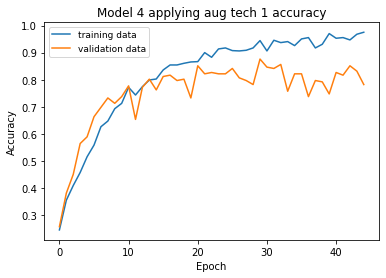

In [49]:
# summarize history for accuracy - Model 4 with aug1
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model 4 applying aug tech 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

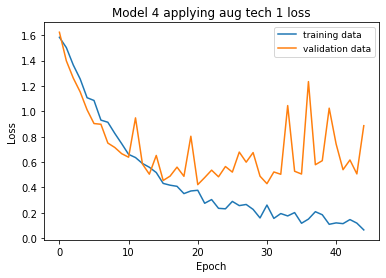

In [50]:
# summarize history for loss -Model 4 with aug1
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model 4 applying aug tech 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

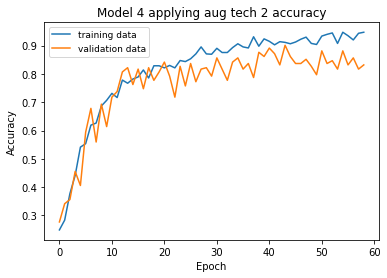

In [62]:
# summarize history for accuracy - Model 4 with aug2
plt.plot(history_aug2.history['accuracy'])
plt.plot(history_aug2.history['val_accuracy'])
plt.title('Model 4 applying aug tech 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

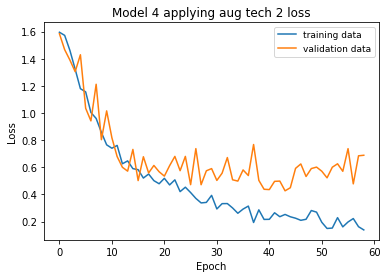

In [64]:
# summarize history for loss -Model 4 with aug2
plt.plot(history_aug2.history['loss'])
plt.plot(history_aug2.history['val_loss'])
plt.title('Model 4 applying aug tech 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

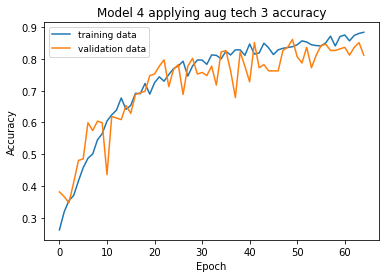

In [65]:
# summarize history for accuracy - Model 4 with aug3
plt.plot(history_aug3.history['accuracy'])
plt.plot(history_aug3.history['val_accuracy'])
plt.title('Model 4 applying aug tech 3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

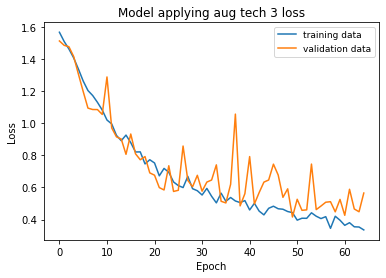

In [66]:
# summarize history for loss -Model 4 with aug3
plt.plot(history_aug3.history['loss'])
plt.plot(history_aug3.history['val_loss'])
plt.title('Model applying aug tech 3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

# **Deep Learning Project: Food Cuisine Classification - Phase V**

In [26]:
# Image augmentation 3
my_generator_aug3 = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

# Build generator
train_generator_best3 = my_generator_aug3.flow_from_directory(train_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
val_generator_best3 = my_generator_aug3.flow_from_directory(val_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 
test_generator_best3 = my_generator_aug3.flow_from_directory(test_dir,
                                                      target_size=(256, 256), 
                                                      batch_size=5, 
                                                      class_mode='categorical',
                                                      ) 

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


**Effect of Regularization - L2**

In [36]:
# L2 on model 4 & Auementation Technique 3 
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model4_l2 = Sequential()
model4_l2.add( Conv2D( 64, ( 3, 3 ),kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (256,256,3)) )
model4_l2.add( MaxPool2D(4, 4) )
model4_l2.add( Conv2D( 64, ( 3, 3), kernel_regularizer=regularizers.l2(0.001),activation = 'relu' ) )
model4_l2.add( MaxPool2D(4, 4) )
model4_l2.add( Conv2D( 64, ( 3, 3), kernel_regularizer=regularizers.l2(0.001),activation = 'relu' ) )
model4_l2.add( MaxPool2D(4, 4) )
model4_l2.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4_l2.add( Flatten() )
model4_l2.add( Dense( 10, kernel_regularizer=regularizers.l2(0.001),activation = 'relu' ) )
model4_l2.add( Dense( 5, activation = 'softmax' ) )
model4_l2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 64)         

In [37]:
model4_l2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_l2 = model4_l2.fit( train_generator_best3, validation_data = val_generator_best3, callbacks=[a,b], epochs= 200, batch_size = 64 )

Epoch 1/200
163/163 [==============================] - 21s 127ms/step - loss: 1.7115 - accuracy: 0.2440 - val_loss: 1.6264 - val_accuracy: 0.2822
Epoch 2/200
163/163 [==============================] - 20s 124ms/step - loss: 1.5869 - accuracy: 0.3611 - val_loss: 1.5333 - val_accuracy: 0.3465
Epoch 3/200
163/163 [==============================] - 20s 124ms/step - loss: 1.4858 - accuracy: 0.3443 - val_loss: 1.4741 - val_accuracy: 0.3267
Epoch 4/200
163/163 [==============================] - 20s 123ms/step - loss: 1.4359 - accuracy: 0.3953 - val_loss: 1.4891 - val_accuracy: 0.3515
Epoch 5/200
163/163 [==============================] - 20s 123ms/step - loss: 1.4369 - accuracy: 0.3596 - val_loss: 1.4878 - val_accuracy: 0.3614
Epoch 6/200
163/163 [==============================] - 20s 123ms/step - loss: 1.4355 - accuracy: 0.4046 - val_loss: 1.3493 - val_accuracy: 0.4059
Epoch 7/200
163/163 [==============================] - 20s 123ms/step - loss: 1.3872 - accuracy: 0.4036 - val_loss: 1.4051 -

In [38]:
#Evaluate model - L2
#prediction4 = model4.predict( test_generator)
scores = model4_l2.evaluate(test_generator_best3)
print("\n%s: %.2f%%" % (model4_l2.metrics_names[1], scores[1]*100))

51/51 [==============================] - 4s 75ms/step - loss: 0.5643 - accuracy: 0.8543

accuracy: 85.43%


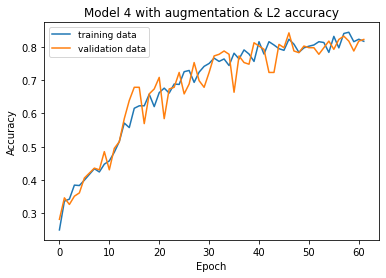

In [39]:
# summarize history for accuracy - L2
plt.plot(history_l2.history['accuracy'])
plt.plot(history_l2.history['val_accuracy'])
plt.title('Model 4 with augmentation & L2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

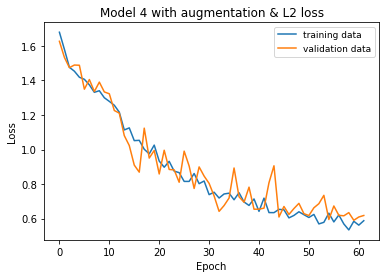

In [40]:
# summarize history for loss - L2
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('Model 4 with augmentation & L2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

**Effect of Regularization - Dropout**

In [56]:
# Dropout on model 4 & Auementation Technique 3 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Dropout
model4_dp = Sequential()
model4_dp.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model4_dp.add( Dropout(rate = 0.3))
model4_dp.add( MaxPool2D(4, 4) )
model4_dp.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4_dp.add( Dropout(rate = 0.3))
model4_dp.add( MaxPool2D(4, 4) )
model4_dp.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4_dp.add( Dropout(rate = 0.3))
model4_dp.add( MaxPool2D(4, 4) )
model4_dp.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4_dp.add( Flatten() )
model4_dp.add( Dense( 10, activation = 'relu' ) )
model4_dp.add( Dropout(rate = 0.3))
model4_dp.add( Dense( 5, activation = 'softmax' ) )
model4_dp.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
dropout_3 (Dropout)          (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)      

In [57]:
model4_dp.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_dropout = model4_dp.fit( train_generator_best3, validation_data = val_generator_best3, callbacks=[a,b], epochs= 100, batch_size = 64 )

Epoch 1/100
163/163 [==============================] - 28s 169ms/step - loss: 1.5882 - accuracy: 0.2624 - val_loss: 1.5599 - val_accuracy: 0.3317
Epoch 2/100
163/163 [==============================] - 27s 167ms/step - loss: 1.5187 - accuracy: 0.3142 - val_loss: 1.5285 - val_accuracy: 0.3515
Epoch 3/100
163/163 [==============================] - 27s 167ms/step - loss: 1.5088 - accuracy: 0.3213 - val_loss: 1.5541 - val_accuracy: 0.3713
Epoch 4/100
163/163 [==============================] - 27s 166ms/step - loss: 1.4843 - accuracy: 0.3483 - val_loss: 1.4827 - val_accuracy: 0.3515
Epoch 5/100
163/163 [==============================] - 27s 167ms/step - loss: 1.4401 - accuracy: 0.3128 - val_loss: 1.4709 - val_accuracy: 0.4208
Epoch 6/100
163/163 [==============================] - 27s 167ms/step - loss: 1.4570 - accuracy: 0.3166 - val_loss: 1.4874 - val_accuracy: 0.4109
Epoch 7/100
163/163 [==============================] - 27s 167ms/step - loss: 1.4277 - accuracy: 0.3361 - val_loss: 1.4483 -

In [58]:
#Evaluate model - Dropout
#prediction4 = model4.predict( test_generator)
scores = model4_dp.evaluate(test_generator_best3)
print("\n%s: %.2f%%" % (model4_dp.metrics_names[1], scores[1]*100))

51/51 [==============================] - 4s 74ms/step - loss: 0.5532 - accuracy: 0.8228

accuracy: 82.28%


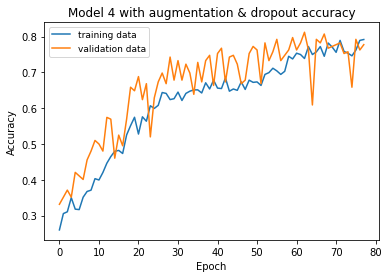

In [59]:
# summarize history for accuracy - Dropout
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Model 4 with augmentation & dropout accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

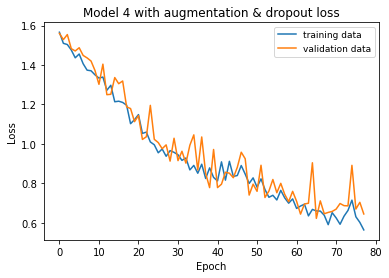

In [60]:
# summarize history for loss - Dropout
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model 4 with augmentation & dropout loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

**Effect of Regularization - Batch normalization**

In [61]:
# Batch Normalization on model 4 & Auementation Technique 3 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D,BatchNormalization
model4_bn = Sequential()
model4_bn.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256,256,3)) )
model4_bn.add(BatchNormalization())
model4_bn.add( MaxPool2D(4, 4) )
model4_bn.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4_bn.add(BatchNormalization())
model4_bn.add( MaxPool2D(4, 4) )
model4_bn.add( Conv2D( 64, ( 3, 3), activation = 'relu' ) )
model4_bn.add(BatchNormalization())
model4_bn.add( MaxPool2D(4, 4) )
model4_bn.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model4_bn.add( Flatten() )
model4_bn.add( Dense( 10, activation = 'relu' ) )
model4_bn.add(BatchNormalization())
model4_bn.add( Dense( 5, activation = 'softmax' ) )
model4_bn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 254, 254, 64)      256       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 13, 13, 64)      

In [62]:
model4_bn.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_bn = model4_bn.fit( train_generator_best3, validation_data = val_generator_best3, callbacks=[a,b], epochs= 100, batch_size = 64 )

Epoch 1/100
163/163 [==============================] - 31s 188ms/step - loss: 1.6411 - accuracy: 0.3096 - val_loss: 2.2094 - val_accuracy: 0.2475
Epoch 2/100
163/163 [==============================] - 31s 187ms/step - loss: 1.3974 - accuracy: 0.4444 - val_loss: 2.0087 - val_accuracy: 0.2030
Epoch 3/100
163/163 [==============================] - 30s 187ms/step - loss: 1.3470 - accuracy: 0.4519 - val_loss: 1.6573 - val_accuracy: 0.3069
Epoch 4/100
163/163 [==============================] - 31s 188ms/step - loss: 1.3646 - accuracy: 0.4534 - val_loss: 1.6022 - val_accuracy: 0.3366
Epoch 5/100
163/163 [==============================] - 30s 187ms/step - loss: 1.3143 - accuracy: 0.4589 - val_loss: 2.1016 - val_accuracy: 0.2624
Epoch 6/100
163/163 [==============================] - 30s 186ms/step - loss: 1.2596 - accuracy: 0.4689 - val_loss: 1.1916 - val_accuracy: 0.5000
Epoch 7/100
163/163 [==============================] - 30s 186ms/step - loss: 1.2198 - accuracy: 0.4992 - val_loss: 1.0766 -

In [63]:
#Evaluate model - batch normalization
#prediction4 = model4.predict( test_generator)
scores = model4_bn.evaluate(test_generator_best3)
print("\n%s: %.2f%%" % (model4_bn.metrics_names[1], scores[1]*100))

51/51 [==============================] - 4s 82ms/step - loss: 0.5667 - accuracy: 0.7992

accuracy: 79.92%


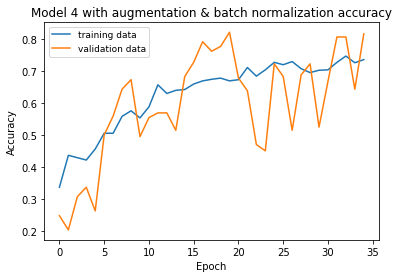

In [64]:
# summarize history for accuracy - batch normalization
plt.plot(history_bn.history['accuracy'])
plt.plot(history_bn.history['val_accuracy'])
plt.title('Model 4 with augmentation & batch normalization accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

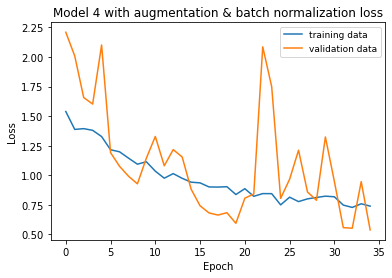

In [65]:
# summarize history for loss - batch normalization
plt.plot(history_bn.history['loss'])
plt.plot(history_bn.history['val_loss'])
plt.title('Model 4 with augmentation & batch normalization loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

# **Deep Learning Project: Food Cuisine Classification - Phase VI**

**Using VGG-16 model on food cuisine images**

In [38]:
# images rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# Rescale all images by 1./255
my_generator_vgg = ImageDataGenerator(rescale=1./224)

In [40]:
# Generator for training dataset
train_generator_vgg = my_generator_vgg.flow_from_directory( train_dir, target_size=(224, 224), batch_size=1, class_mode='categorical')
# Generator for validation dataset
valid_generator_vgg = my_generator_vgg.flow_from_directory( val_dir, target_size=(224, 224), batch_size=1, class_mode='categorical')
# Generator for test dataset
test_generator_vgg = my_generator_vgg.flow_from_directory( test_dir, target_size=(224, 224), batch_size=1, class_mode='categorical')

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [41]:
# train x and y
import numpy as np
trainx = np.zeros((811, 224, 224, 3))
trainy = np.zeros((811, 1))
trainy_of = np.zeros((811,5))
for i in range(811):
   x, y = next(train_generator_vgg)
   trainx[i] = x
   trainy_of[i] = y
   trainy[i] = np.where(y[0]==1)[0][0]

In [42]:
# validation x and y
import numpy as np
valx = np.zeros((202, 224, 224, 3))
valy = np.zeros((202, 1))
valy_of = np.zeros((202,5))
for i in range(202):
   x, y = next(valid_generator_vgg)
   valx[i] = x
   valy_of[i] = y
   valy[i] = np.where(y[0]==1)[0][0]

In [43]:
#test x and y
import numpy as np
testx = np.zeros((254, 224, 224, 3))
testy = np.zeros((254, 1))
testy_of = np.zeros((254,5))
for i in range(254):
   x, y = next(test_generator_vgg)
   testx[i] = x
   testy_of[i]=y
   testy[i] = np.where(y[0]==1)[0][0]

In [44]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)
val_labels = to_categorical(valy)
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(811, 5)
(202, 5)
(254, 5)


In [45]:
valx.shape

(202, 224, 224, 3)

In [132]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base=VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))

In [119]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [156]:
x_test_vgg_output = conv_base.predict(testx, verbose = 1)

8/8 [==============================] - 15s 2s/step


In [133]:
x_train_vgg_output = conv_base.predict(trainx, verbose = 1)
x_val_vgg_output = conv_base.predict(valx,verbose = 1)

7/7 [==============================] - 12s 2s/step


In [158]:
print(x_val_vgg_output.shape)
print(x_train_vgg_output.shape)
print(x_test_vgg_output.shape)

(202, 7, 7, 512)
(811, 7, 7, 512)
(254, 7, 7, 512)


In [159]:
#reshape / flaten the data
import numpy as np
x_test_new = np.reshape(x_test_vgg_output, (254, 7 * 7 * 512))
x_val_new = np.reshape(x_val_vgg_output, (202, 7 * 7 * 512))
x_train_new = np.reshape(x_train_vgg_output, (811, 7 * 7 * 512))

In [160]:
print(x_val_new.shape)
print(x_train_new.shape)
print(x_test_new.shape)

(202, 25088)
(811, 25088)
(254, 25088)


In [149]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

new_model = models.Sequential()
new_model.add(layers.Dense(256, activation='relu', input_dim = 7 * 7 * 512))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(5, activation='softmax'))

new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = new_model.fit(x_train_new, train_labels, epochs=150, batch_size=128, validation_data = (x_val_new, val_labels))

Epoch 1/150
7/7 [==============================] - 1s 57ms/step - loss: 15.2802 - accuracy: 0.2585 - val_loss: 5.8173 - val_accuracy: 0.3168
Epoch 2/150
7/7 [==============================] - 0s 33ms/step - loss: 3.6749 - accuracy: 0.5232 - val_loss: 1.3982 - val_accuracy: 0.6287
Epoch 3/150
7/7 [==============================] - 0s 34ms/step - loss: 1.0714 - accuracy: 0.7160 - val_loss: 0.3340 - val_accuracy: 0.8515
Epoch 4/150
7/7 [==============================] - 0s 35ms/step - loss: 0.5140 - accuracy: 0.8240 - val_loss: 0.6971 - val_accuracy: 0.7030
Epoch 5/150
7/7 [==============================] - 0s 32ms/step - loss: 0.5962 - accuracy: 0.7902 - val_loss: 0.5457 - val_accuracy: 0.8317
Epoch 6/150
7/7 [==============================] - 0s 36ms/step - loss: 0.3584 - accuracy: 0.8648 - val_loss: 0.4052 - val_accuracy: 0.8663
Epoch 7/150
7/7 [==============================] - 0s 38ms/step - loss: 0.2400 - accuracy: 0.9203 - val_loss: 0.3080 - val_accuracy: 0.8960
Epoch 8/150
7/7 [==

In [163]:
# Evaluate model on test data
prediction = new_model.predict(x_test_new)

#scores = new_model.evaluate(x_test_new)
#print("\n%s: %.2f%%" % (new_model.metrics_names[1], scores[1]*100))

In [165]:
print(prediction)

[[1.0000000e+00 3.2987690e-24 3.2686792e-25 1.0132134e-29 9.2330458e-24]
 [2.8702748e-25 3.6804786e-16 1.0000000e+00 1.5442463e-15 5.0197669e-24]
 [1.0000000e+00 8.3651057e-23 1.0816747e-22 4.4427407e-16 7.0072987e-16]
 ...
 [1.0641818e-15 1.4934432e-16 6.2372425e-18 1.0000000e+00 3.8683052e-17]
 [2.6448396e-15 3.0362585e-08 4.1767845e-13 7.0753555e-18 1.0000000e+00]
 [1.0446913e-07 9.7872422e-04 4.7880114e-08 7.4888057e-08 9.9902105e-01]]


In [169]:
predy=np.argmax(prediction,axis=1)

In [173]:
test_value=np.argmax(test_labels, axis=1)

In [178]:
acc=np.mean(predy==test_value)
print(acc)

0.9173228346456693


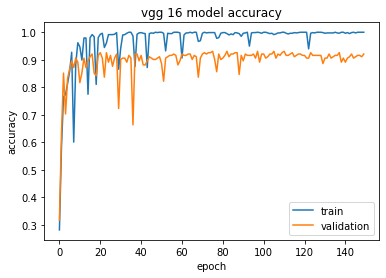

In [179]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('vgg 16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

**Use recent architectures - ResNet**

In [111]:
# images rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [156]:
# Image augmentation 2
my_generator_aug2 = ImageDataGenerator(
    rescale=1./255, 
    )

# Build generator
train_generator_best2 = my_generator_aug2.flow_from_directory(train_dir,
                                                      target_size=(32, 32), 
                                                      batch_size=1, 
                                                      class_mode='categorical',
                                                      ) 
val_generator_best2 = my_generator_aug2.flow_from_directory(val_dir,
                                                      target_size=(32, 32), 
                                                      batch_size=1, 
                                                      class_mode='categorical',
                                                      ) 
test_generator_best2 = my_generator_aug2.flow_from_directory(test_dir,
                                                      target_size=(32, 32), 
                                                      batch_size=1, 
                                                      class_mode='categorical',
                                                      ) 

Found 811 images belonging to 5 classes.
Found 202 images belonging to 5 classes.
Found 254 images belonging to 5 classes.


In [157]:
# train x and y
import numpy as np
x_train = np.zeros((811, 32, 32, 3))
y_train= np.zeros((811, 5))
for i in range(811):
   x, y = next(train_generator_best2)
   x_train[i] = x
   y_train[i] = y

In [158]:
# validation x and y
import numpy as np
x_val = np.zeros((202, 32, 32, 3))
y_val = np.zeros((202,5))
for i in range(202):
   x, y = next(val_generator_best2)
   x_val[i] = x
   y_val[i] = y

In [159]:
# test x and y
import numpy as np
x_test = np.zeros((254, 32, 32, 3))
#y_test= np.zeros((254, 1))
y_test = np.zeros((254,5))
for i in range(254):
   x, y = next(test_generator_best2)
   x_test[i] = x
   y_test[i] = y

In [160]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(811, 32, 32, 3)
(811, 5)
(202, 32, 32, 3)
(202, 5)
(254, 32, 32, 3)
(254, 5)


In [236]:
#Early Stop:
from tensorflow import keras
a= keras.callbacks.ModelCheckpoint(filepath='model.h5',monitor='val_accuracy',save_best_only=True)
b= keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 50)

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [238]:
input_img = Input(shape=(32,32,3))
output1 = Conv2D(16, (3, 3), activation='relu')(input_img)
for i in range(1):
    output2 = Conv2D(16, (3, 3), padding = 'same', activation='relu')(output1)
    output2 = BatchNormalization()(output2)
    output2 = Conv2D(16, (3, 3), padding = 'same', activation='relu')(output2)
    output2 = Dropout(0.2)(output2)
    output2 = add([output1, output2])
    output1 = output2
output3 = Flatten()(output2)
output4 = Dense(units = 16, activation = 'relu')(output3)
output5 = Dense(units = 16, activation = 'relu')(output4)
output6 = Dense(units = 5, activation = 'softmax')(output5)
model1 = Model(inputs=input_img, outputs=output6)
model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model1.summary())

Model: "model_59"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_65 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_625 (Conv2D)             (None, 30, 30, 16)   448         input_65[0][0]                   
__________________________________________________________________________________________________
conv2d_626 (Conv2D)             (None, 30, 30, 16)   2320        conv2d_625[0][0]                 
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 30, 30, 16)   64          conv2d_626[0][0]                 
___________________________________________________________________________________________

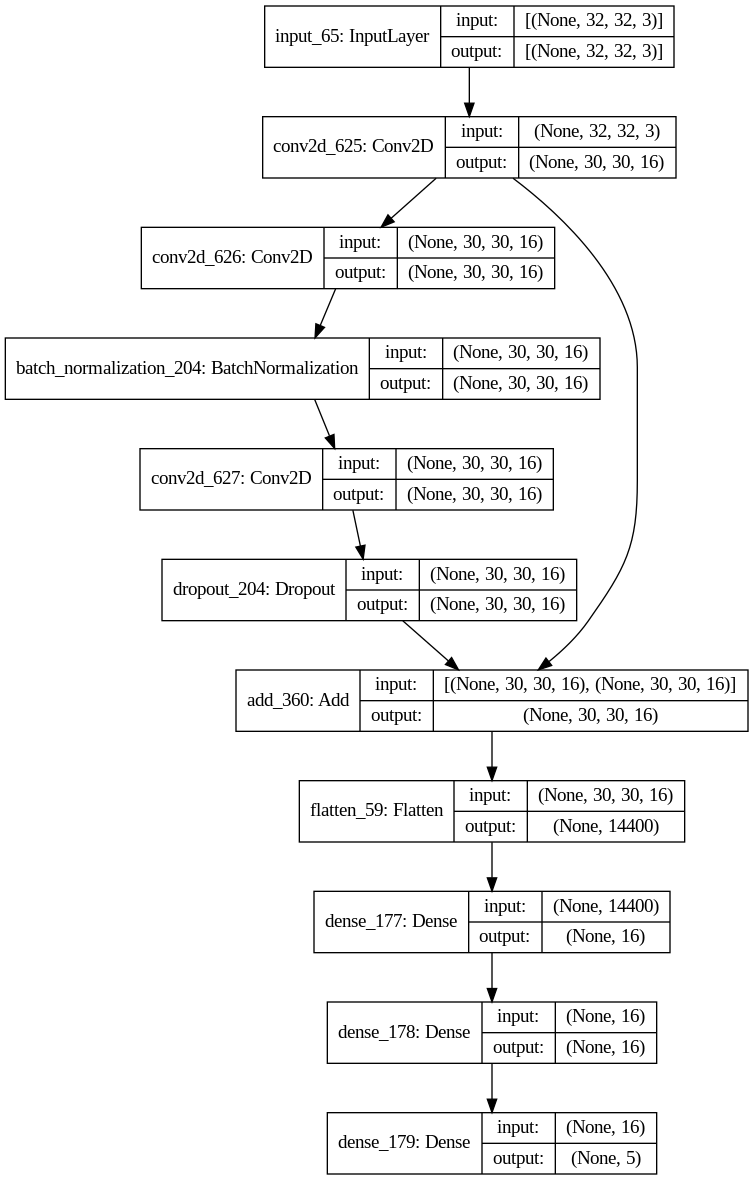

In [239]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [240]:
history_resnet = model1.fit( x_train, y_train, epochs = 200, batch_size = 16, callbacks=[a,b], validation_data=(x_val,y_val))

Epoch 1/200
51/51 [==============================] - 1s 13ms/step - loss: 2.8273 - accuracy: 0.2209 - val_loss: 1.5876 - val_accuracy: 0.2673
Epoch 2/200
13/51 [======>.......................] - ETA: 0s - loss: 1.6414 - accuracy: 0.2237

/home/John/.local/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


51/51 [==============================] - 1s 10ms/step - loss: 1.5843 - accuracy: 0.2808 - val_loss: 1.5894 - val_accuracy: 0.3020
Epoch 3/200
51/51 [==============================] - 1s 10ms/step - loss: 1.3821 - accuracy: 0.3822 - val_loss: 1.6043 - val_accuracy: 0.2277
Epoch 4/200
51/51 [==============================] - 1s 10ms/step - loss: 1.1933 - accuracy: 0.4992 - val_loss: 1.6030 - val_accuracy: 0.2178
Epoch 5/200
51/51 [==============================] - 1s 10ms/step - loss: 0.9426 - accuracy: 0.6055 - val_loss: 1.6751 - val_accuracy: 0.1485
Epoch 6/200
51/51 [==============================] - 1s 10ms/step - loss: 0.7485 - accuracy: 0.7020 - val_loss: 1.5642 - val_accuracy: 0.2327
Epoch 7/200
51/51 [==============================] - 1s 10ms/step - loss: 0.4746 - accuracy: 0.8440 - val_loss: 1.5313 - val_accuracy: 0.3465
Epoch 8/200
51/51 [==============================] - 1s 10ms/step - loss: 0.3094 - accuracy: 0.9023 - val_loss: 1.5750 - val_accuracy: 0.3911
Epoch 9/200
51/51 

In [241]:
# Evaluate model on test data
prediction1 = model1.predict(x_test)
predy1=np.argmax(prediction1,axis=1)
test_value=np.argmax(y_test, axis=1)
acc1=np.mean(predy1==test_value)
print(acc1)

0.6299212598425197


In [242]:
input_img = Input(shape=(32,32,3))
output1 = Conv2D(32, (3, 3), activation='relu')(input_img)
for i in range(2):
    output2 = Conv2D(32, (3, 3), padding = 'same', activation='relu')(output1)
    output2 = BatchNormalization()(output2)
    output2 = Conv2D(32, (3, 3), padding = 'same', activation='relu')(output2)
    output2 = Dropout(0.1)(output2)
    output2 = add([output1, output2])
    output1 = output2
output3 = Flatten()(output2)
output4 = Dense(units = 32, activation = 'relu')(output3)
output5 = Dense(units = 32, activation = 'relu')(output4)
output6 = Dense(units = 5, activation = 'softmax')(output5)
model2 = Model(inputs=input_img, outputs=output6)
model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model2.summary())

Model: "model_60"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_66 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_628 (Conv2D)             (None, 30, 30, 32)   896         input_66[0][0]                   
__________________________________________________________________________________________________
conv2d_629 (Conv2D)             (None, 30, 30, 32)   9248        conv2d_628[0][0]                 
__________________________________________________________________________________________________
batch_normalization_205 (BatchN (None, 30, 30, 32)   128         conv2d_629[0][0]                 
___________________________________________________________________________________________

In [243]:
history_resnet2 = model2.fit( x_train, y_train, epochs = 200, batch_size = 16, callbacks=[a,b], validation_data=(x_val,y_val))

Epoch 1/200
51/51 [==============================] - 3s 32ms/step - loss: 8.4513 - accuracy: 0.1591 - val_loss: 1.5931 - val_accuracy: 0.2376
Epoch 2/200
51/51 [==============================] - 1s 29ms/step - loss: 1.6750 - accuracy: 0.2039 - val_loss: 1.5880 - val_accuracy: 0.3020
Epoch 3/200
51/51 [==============================] - 1s 29ms/step - loss: 1.5697 - accuracy: 0.3063 - val_loss: 1.5877 - val_accuracy: 0.2624
Epoch 4/200
51/51 [==============================] - 1s 29ms/step - loss: 1.3967 - accuracy: 0.4040 - val_loss: 1.5939 - val_accuracy: 0.2525
Epoch 5/200
51/51 [==============================] - 1s 29ms/step - loss: 1.2977 - accuracy: 0.4498 - val_loss: 1.5831 - val_accuracy: 0.2921
Epoch 6/200
51/51 [==============================] - 1s 29ms/step - loss: 1.1282 - accuracy: 0.5226 - val_loss: 1.6052 - val_accuracy: 0.2525
Epoch 7/200
51/51 [==============================] - 1s 29ms/step - loss: 0.9906 - accuracy: 0.5859 - val_loss: 1.5277 - val_accuracy: 0.3366
Epoch 

In [244]:
prediction2 = model2.predict(x_test)
predy2=np.argmax(prediction2,axis=1)
test_value=np.argmax(y_test, axis=1)
acc2=np.mean(predy2==test_value)
print(acc2)

0.4645669291338583


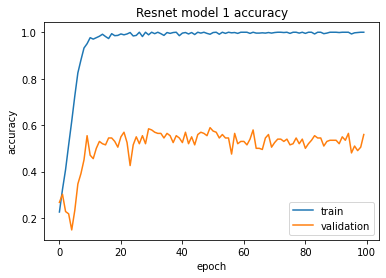

In [250]:
#Acc resnet1
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Resnet model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

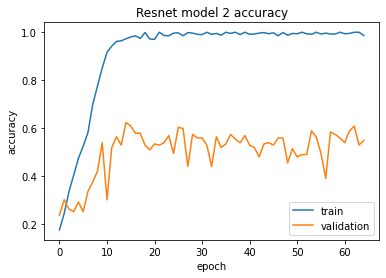

In [251]:
#acc resnet2
plt.plot(history_resnet2.history['accuracy'])
plt.plot(history_resnet2.history['val_accuracy'])
plt.title('Resnet model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

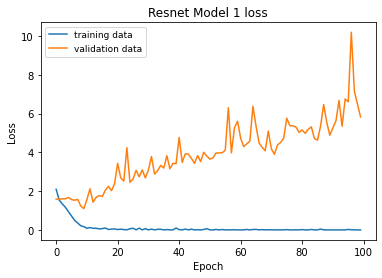

In [252]:
# summarize history for loss resnet1
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Resnet Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()

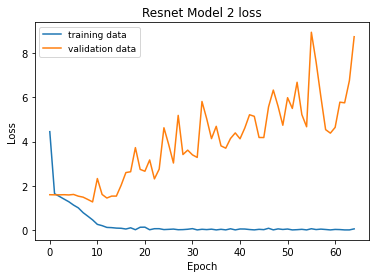

In [253]:
# summarize history for loss resnet2
plt.plot(history_resnet2.history['loss'])
plt.plot(history_resnet2.history['val_loss'])
plt.title('Resnet Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='best',prop={'size': 9})
plt.show()